<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [1]:
import os
# os.chdir("/Users/annabellayang/Documents/Project/fall2023/PHYS129/P4/")


In [2]:
import json 
# Define the file path for the JSON file
json_file_path1 = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path1, 'r') as json_file:
    boolean_list_out1 = json.load(json_file)
    
json_file_path2 = 'problem_1/dataset_2.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path2, 'r') as json_file:
    boolean_list_out2 = json.load(json_file)
    
json_file_path3 = 'problem_1/dataset_3.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path3, 'r') as json_file:
    boolean_list_out3 = json.load(json_file)

print(boolean_list_out1)
print(boolean_list_out2)
print(boolean_list_out3)
    

[True, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, True, True, False, False, True, False, False, False, True, True, False, False, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, True, False, False, False, False, False, False, True, False, False, 

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



196 203 142
500 500 500
Dataset 1: Expectation = 196.0357, Variance = 0.2360
Dataset 2: Expectation = 202.9663, Variance = 0.2388
Dataset 3: Expectation = 142.5714, Variance = 0.2018


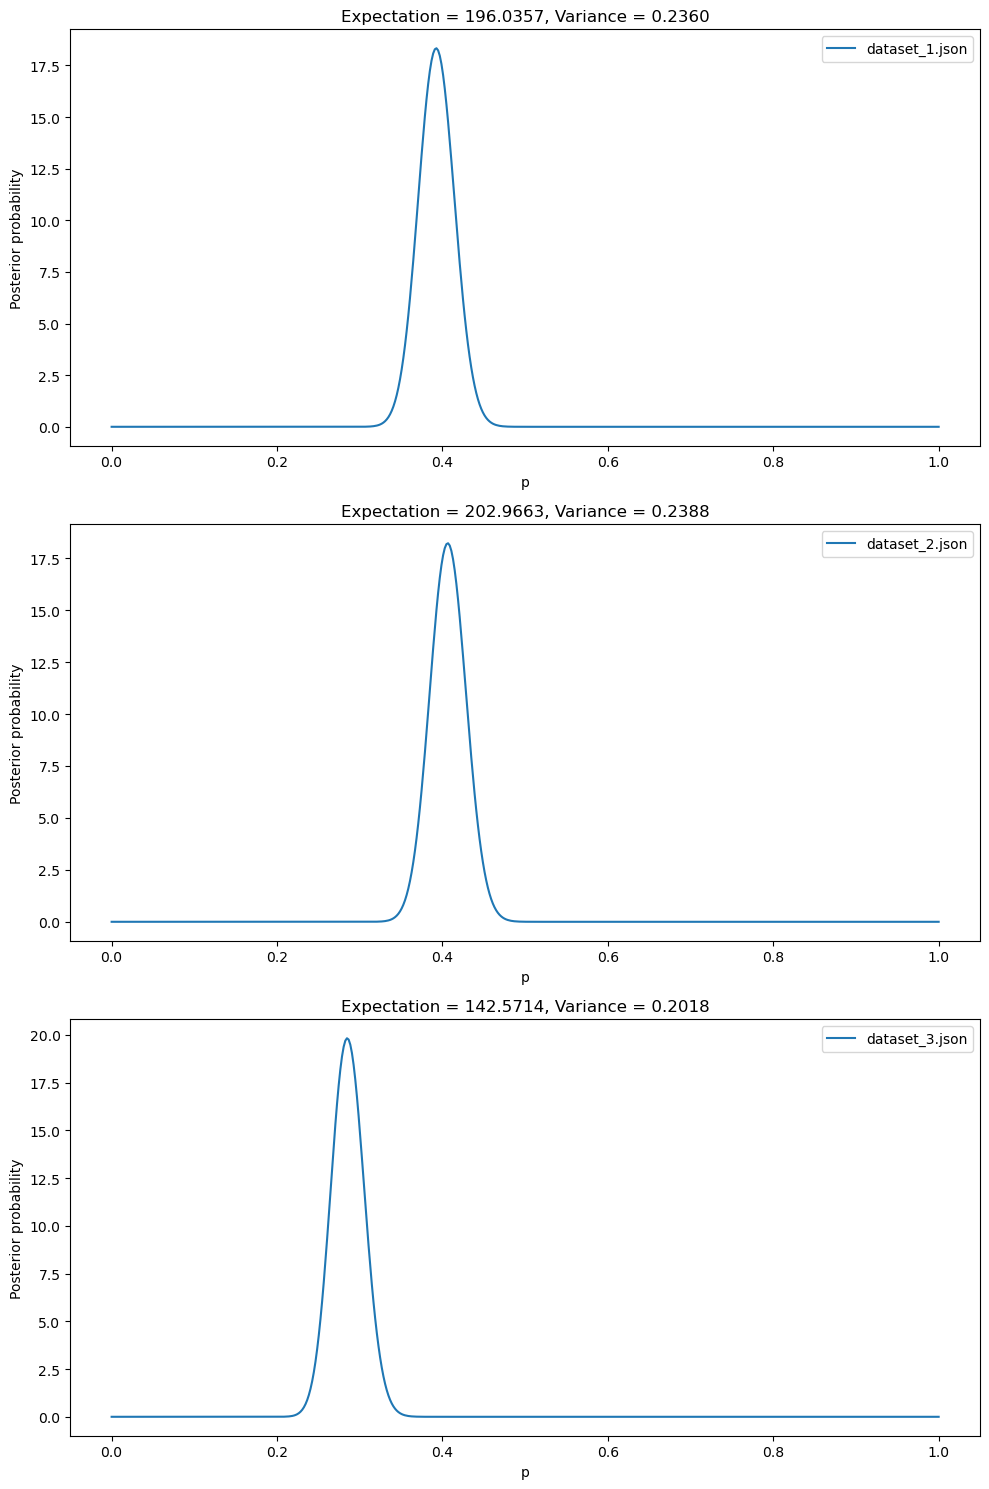

'--------------------Write your code above this line------------------------------'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''

import json
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

dataset_1 = load_data('problem_1/dataset_1.json')
dataset_2 = load_data('problem_1/dataset_2.json')
dataset_3 = load_data('problem_1/dataset_3.json')

def compute_posterior(dataset, p):
    M = sum(dataset)
    N = len(dataset)
    posterior = p**(M+1) * (1-p)**(N-M+1)
    posterior /= np.trapz(posterior, p)
    return posterior

# N = 500
p = np.linspace(0, 1, 500)
posterior_1 = compute_posterior(dataset_1, p)
posterior_2 = compute_posterior(dataset_2, p)
posterior_3 = compute_posterior(dataset_3, p)

def compute_stats(p, posterior):
    expectation = np.sum(p * posterior)
    variance = np.sum((p - expectation/500)**2 * posterior)
    return expectation, variance

expectation_1, variance_1 = compute_stats(p, posterior_1)
expectation_2, variance_2 = compute_stats(p, posterior_2)
expectation_3, variance_3 = compute_stats(p, posterior_3)

print(sum(dataset_1), sum(dataset_2), sum(dataset_3))
print(len(dataset_1), len(dataset_2), len(dataset_3))

print('Dataset 1: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_1, variance_1))
print('Dataset 2: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_2, variance_2))
print('Dataset 3: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_3, variance_3))

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(p, posterior_1, label='dataset_1.json')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Posterior probability')
axs[0].legend()
axs[0].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_1, variance_1))

axs[1].plot(p, posterior_2, label='dataset_2.json')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Posterior probability')
axs[1].legend()
axs[1].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_2, variance_2))

axs[2].plot(p, posterior_3, label='dataset_3.json')
axs[2].set_xlabel('p')
axs[2].set_ylabel('Posterior probability')
axs[2].legend()
axs[2].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_3, variance_3))

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''

Dataset 1: Expectation = 195.8227, Variance = 0.2368
Dataset 1: Expectation = 202.7809, Variance = 0.2396
Dataset 1: Expectation = 142.1454, Variance = 0.2023


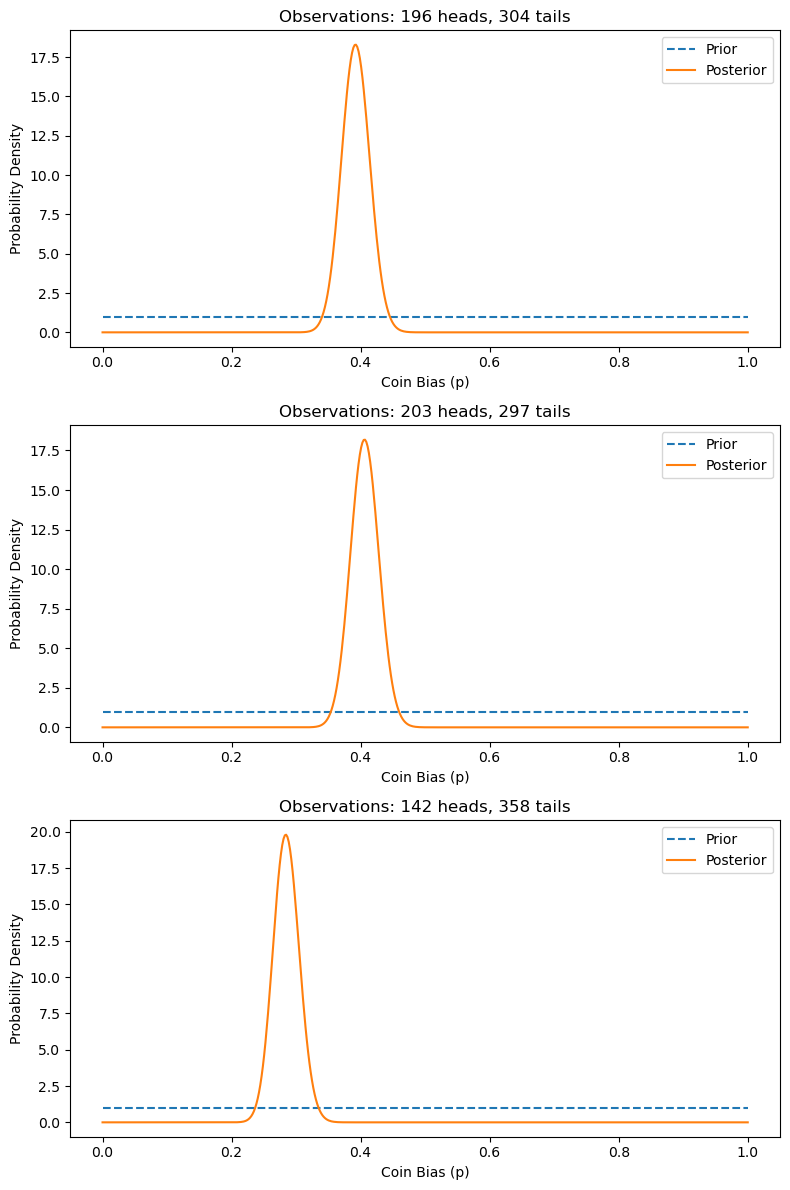

'--------------------Write your code above this line------------------------------'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
# similarly, using the code provided by stats.ipynb file to check if this was correct
from scipy.stats import beta

alpha_prior = 1
beta_prior = 1

# Define the number of coin flips and observed outcomes
num_flips = len(boolean_list_out1)
observed_data = [sum(boolean_list_out1), sum(boolean_list_out2), sum(boolean_list_out3)]  # Number of heads and tails observed

# Create a range of possible bias values (p) for the coin
bias_values = np.linspace(0, 1, 500)

# Create subplots for different observed data outcomes
fig, axs = plt.subplots(len(observed_data), 1, figsize=(8, 12))

for i, observed_heads in enumerate(observed_data):
    # Update the posterior distribution using Bayes' theorem
    alpha_posterior = alpha_prior + observed_heads
    beta_posterior = beta_prior + (num_flips - observed_heads)

    # Calculate the posterior distribution using the Beta distribution
    posterior = beta(alpha_posterior, beta_posterior).pdf(bias_values)
    expectation_1, variance_1 = compute_stats(bias_values, posterior)
    print('Dataset 1: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_1, variance_1))
    # Plot the prior and posterior distributions
    axs[i].plot(bias_values, beta(alpha_prior, beta_prior).pdf(bias_values), label='Prior', linestyle='--')
    axs[i].plot(bias_values, posterior, label='Posterior')
    axs[i].set_title(f'Observations: {observed_heads} heads, {num_flips - observed_heads} tails')
    axs[i].set_xlabel('Coin Bias (p)')
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()

plt.tight_layout()
plt.show()



# the variance looks right
'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

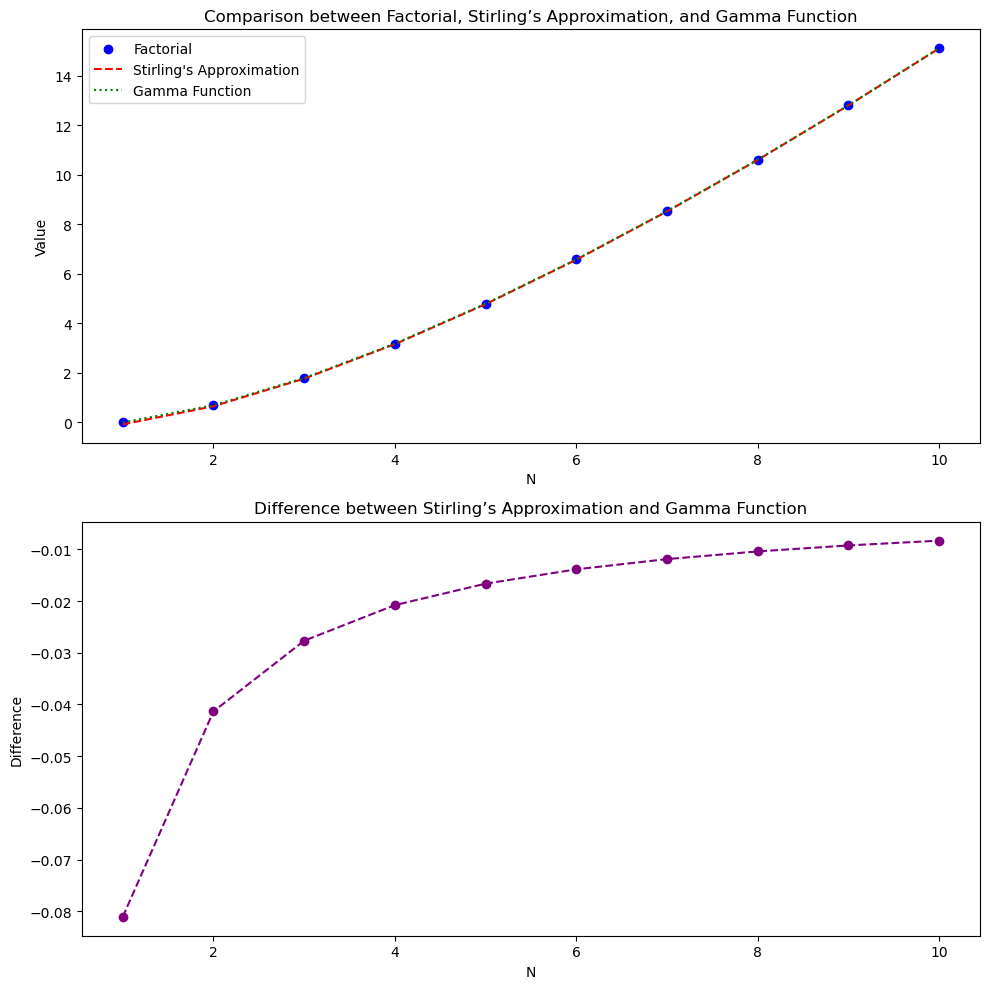

'--------------------Write your code above this line------------------------------'

In [5]:

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
# from math import log, pi, sqrt

def stirling_approximation(n):
    return n * np.log(n) - n + 0.5 * np.log(2 * np.pi * n)
def gamma_function(n):
    return np.log(gamma(n+1))
def factorial_function(n):
    return np.log(factorial(n))

N = np.arange(1, 11)
factorials = [factorial_function(n) for n in N]
stirlings = [stirling_approximation(n) for n in N]
gammas = [gamma_function(n) for n in N]

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].scatter(N, factorials, color='blue', label='Factorial')
axs[0].plot(N, stirlings, color='red', label="Stirling's Approximation", linestyle='dashed')
axs[0].plot(N, gammas, color='green', label='Gamma Function', linestyle='dotted')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].set_title('Comparison between Factorial, Stirling’s Approximation, and Gamma Function')

differences = np.array(stirlings) - np.array(gammas)
axs[1].plot(N, differences, color='purple', marker='o', linestyle='dashed')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Difference')
axs[1].set_title("Difference between Stirling’s Approximation and Gamma Function")

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br> <br>
$p_{max1}$ = True_1/Total_1 = 196/500 = 0.392 <br>
$p_{max2}$ = True_2/Total_2 = 203/500 = 0.406 <br>
$p_{max3}$ = True_3/Total_3 = 142/500 = 0.284 <br>
<br> <br>
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:** 0.392<br> **Data set 2:** 0.406<br>**Data set 3:** 0.284
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

Dataset 1: Expectation = 0.3909, Variance = 0.0005
Dataset 2: Expectation = 0.4048, Variance = 0.0005
Dataset 3: Expectation = 0.2837, Variance = 0.0004
0.02004008016032064


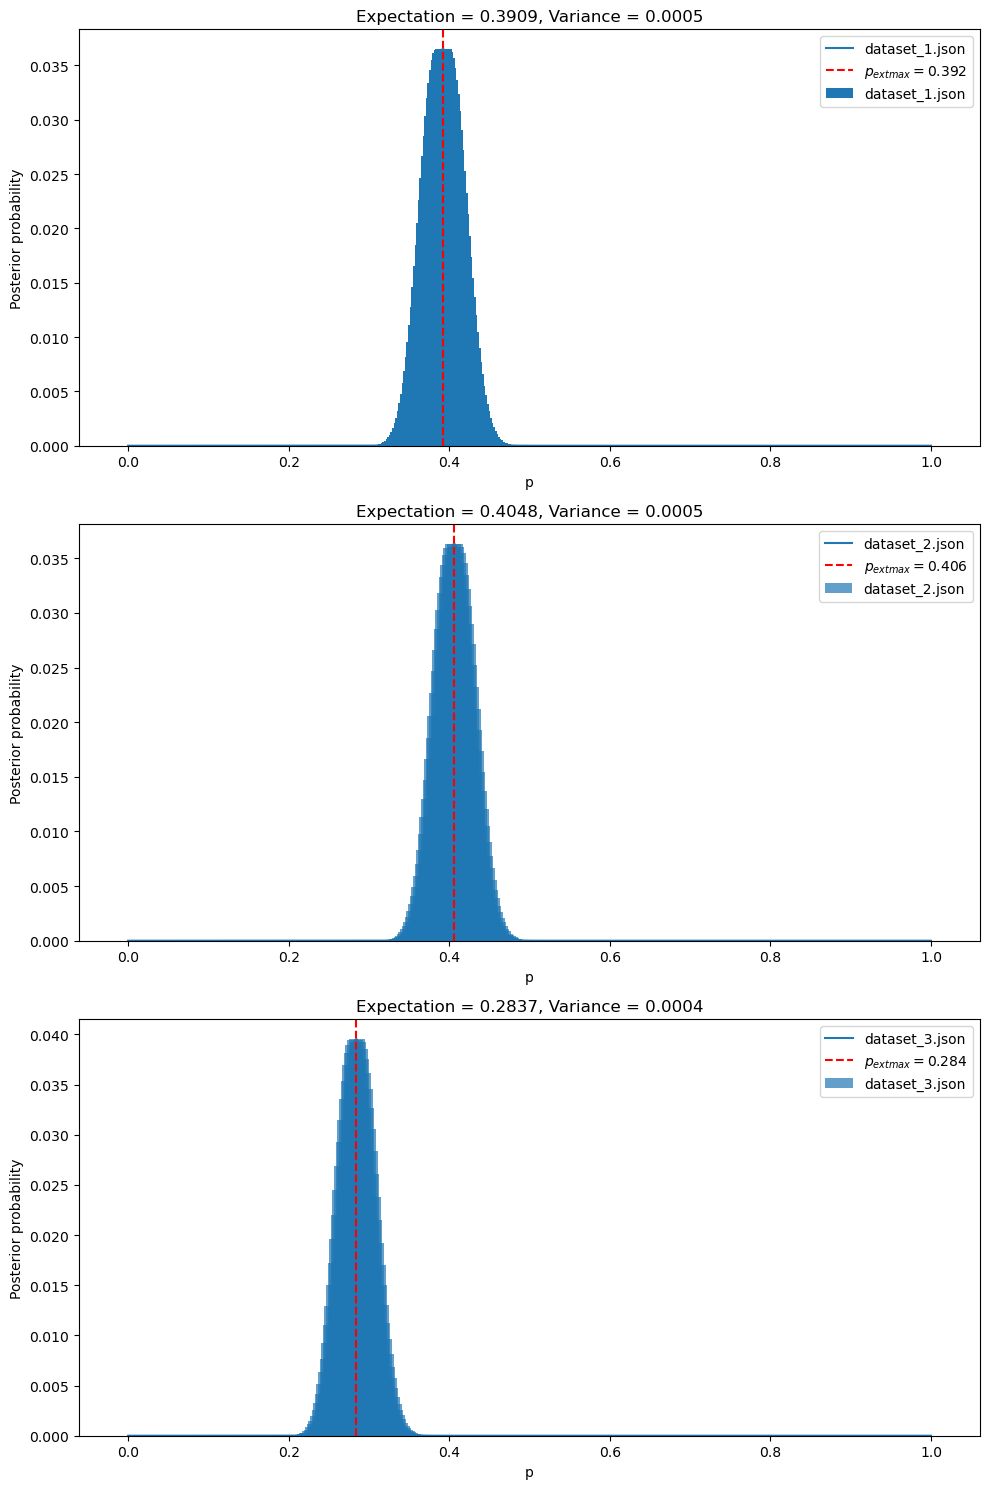

'--------------------Write your code above this line------------------------------'

In [6]:
'''--------------------Write your code below this line------------------------------'''


import json
import numpy as np
import matplotlib.pyplot as plt


def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

dataset_1 = load_data('problem_1/dataset_1.json')
dataset_2 = load_data('problem_1/dataset_2.json')
dataset_3 = load_data('problem_1/dataset_3.json')

def compute_likelihood(dataset, p):
    M = sum(dataset)
    N = len(dataset)
    likelihood = (np.math.factorial(N) / (np.math.factorial(M) * np.math.factorial(N - M))) * (p ** M) * ((1 - p) ** (N - M))
    return likelihood

p = np.linspace(0, 1, 500)
posterior_1 = compute_likelihood(dataset_1, p)
posterior_2 = compute_likelihood(dataset_2, p)
posterior_3 = compute_likelihood(dataset_3, p)

def compute_stats(p, posterior):
    expectation = np.sum(p * posterior)
    variance = np.sum((p - expectation) ** 2 * posterior)
    return expectation, variance

expectation_1, variance_1 = compute_stats(p, posterior_1)
expectation_2, variance_2 = compute_stats(p, posterior_2)
expectation_3, variance_3 = compute_stats(p, posterior_3)

print('Dataset 1: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_1, variance_1))
print('Dataset 2: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_2, variance_2))
print('Dataset 3: Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_3, variance_3))
bar_width = p[10] - p[0]
print(bar_width)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].bar(p, posterior_1, width=bar_width, label='dataset_1.json', alpha=1)
axs[0].plot(p, posterior_1, label='dataset_1.json')
axs[0].axvline(x=0.392, color='r', linestyle='--', label=f'$p_{{\text{{max}}}} = {0.392}$')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Posterior probability')
axs[0].legend()
axs[0].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_1, variance_1))

axs[1].bar(p, posterior_2, width=bar_width, label='dataset_2.json', alpha=0.7)
axs[1].plot(p, posterior_2, label='dataset_2.json')
axs[1].axvline(x=0.406, color='r', linestyle='--', label=f'$p_{{\text{{max}}}} = {0.406}$')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Posterior probability')
axs[1].legend()
axs[1].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_2, variance_2))

axs[2].bar(p, posterior_3, width=bar_width, label='dataset_3.json', alpha=0.7)
axs[2].plot(p, posterior_3, label='dataset_3.json')
axs[2].axvline(x=0.284, color='r', linestyle='--', label=f'$p_{{\text{{max}}}} = {0.284}$')
axs[2].set_xlabel('p')
axs[2].set_ylabel('Posterior probability')
axs[2].legend()
axs[2].title.set_text('Expectation = {:.4f}, Variance = {:.4f}'.format(expectation_3, variance_3))

plt.tight_layout()
plt.show()




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

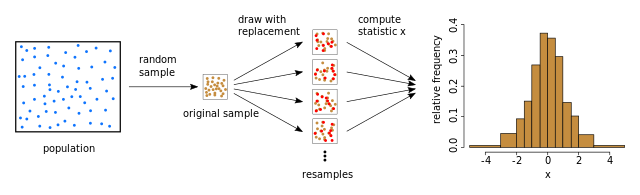
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



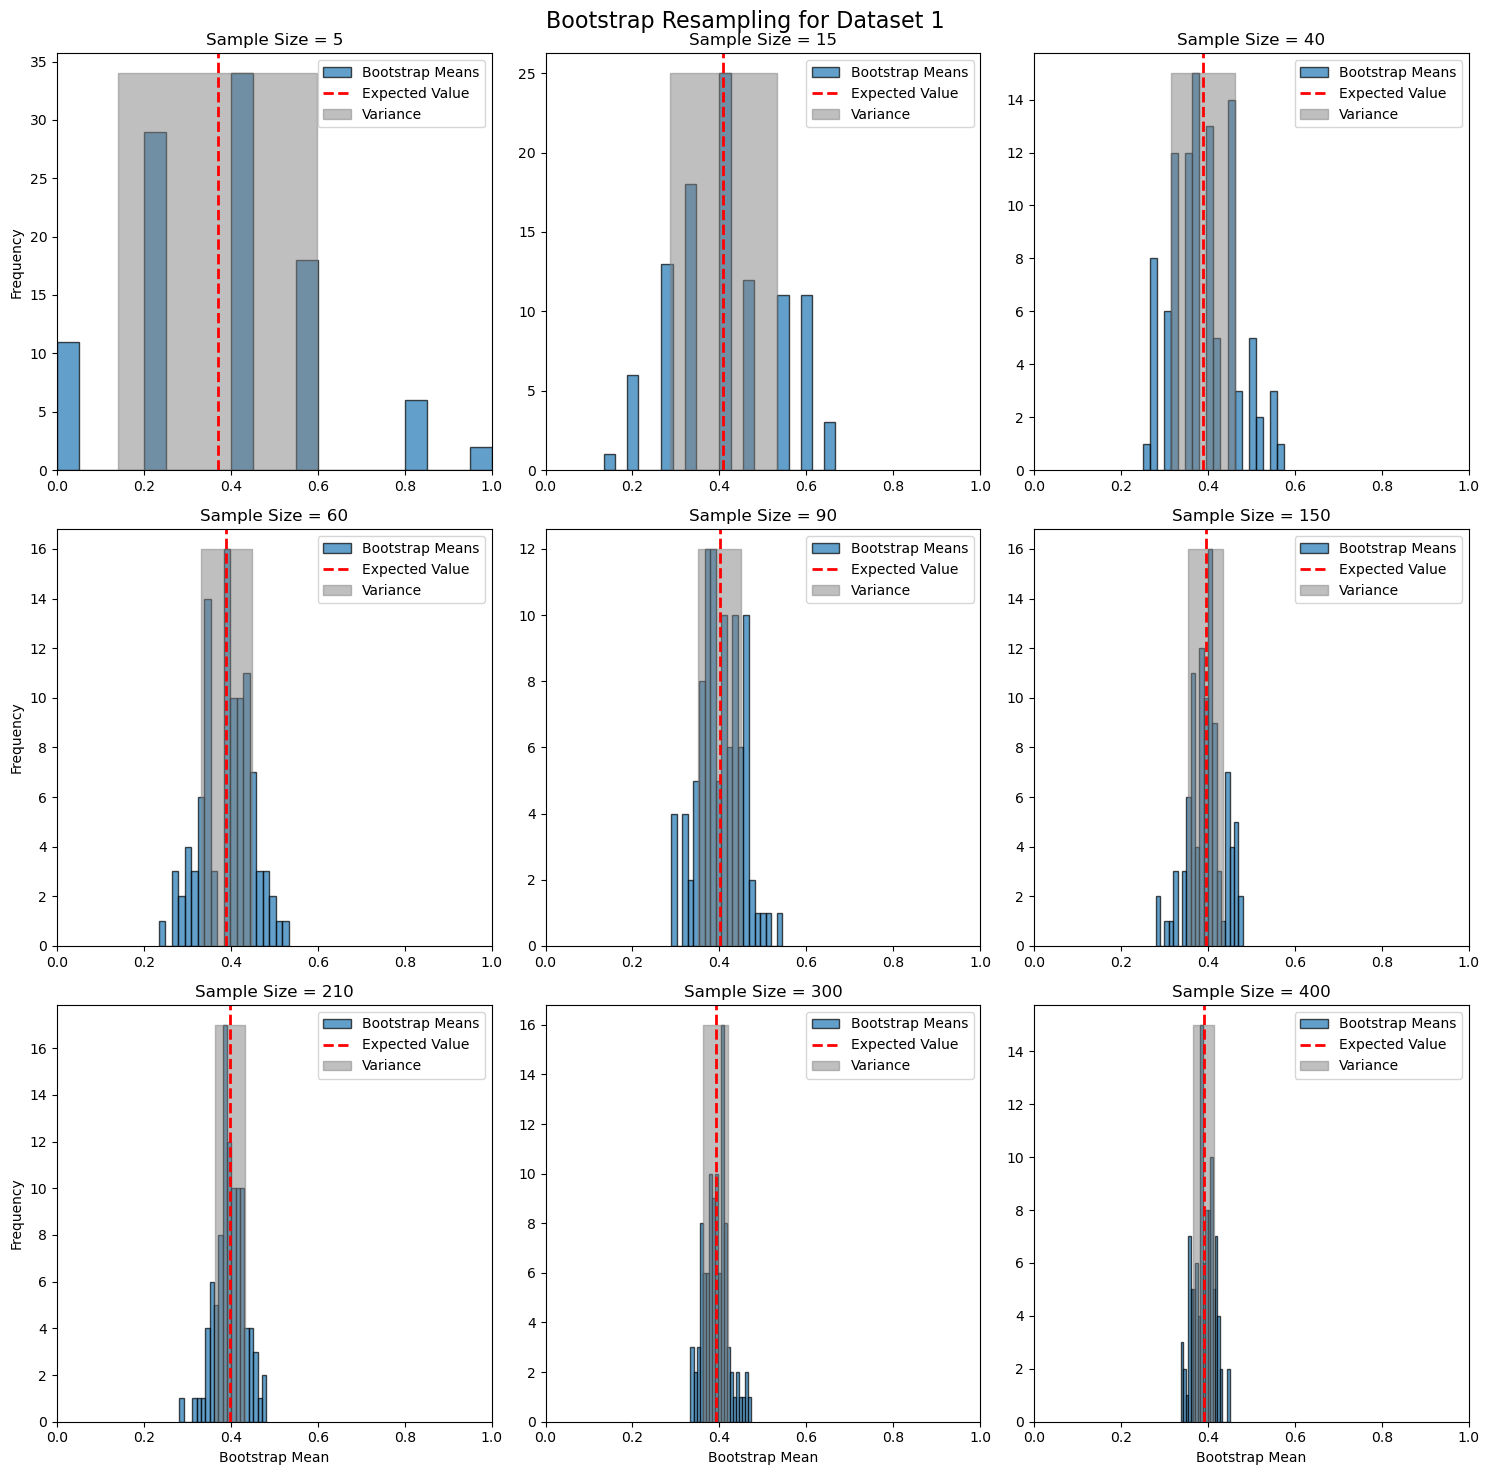

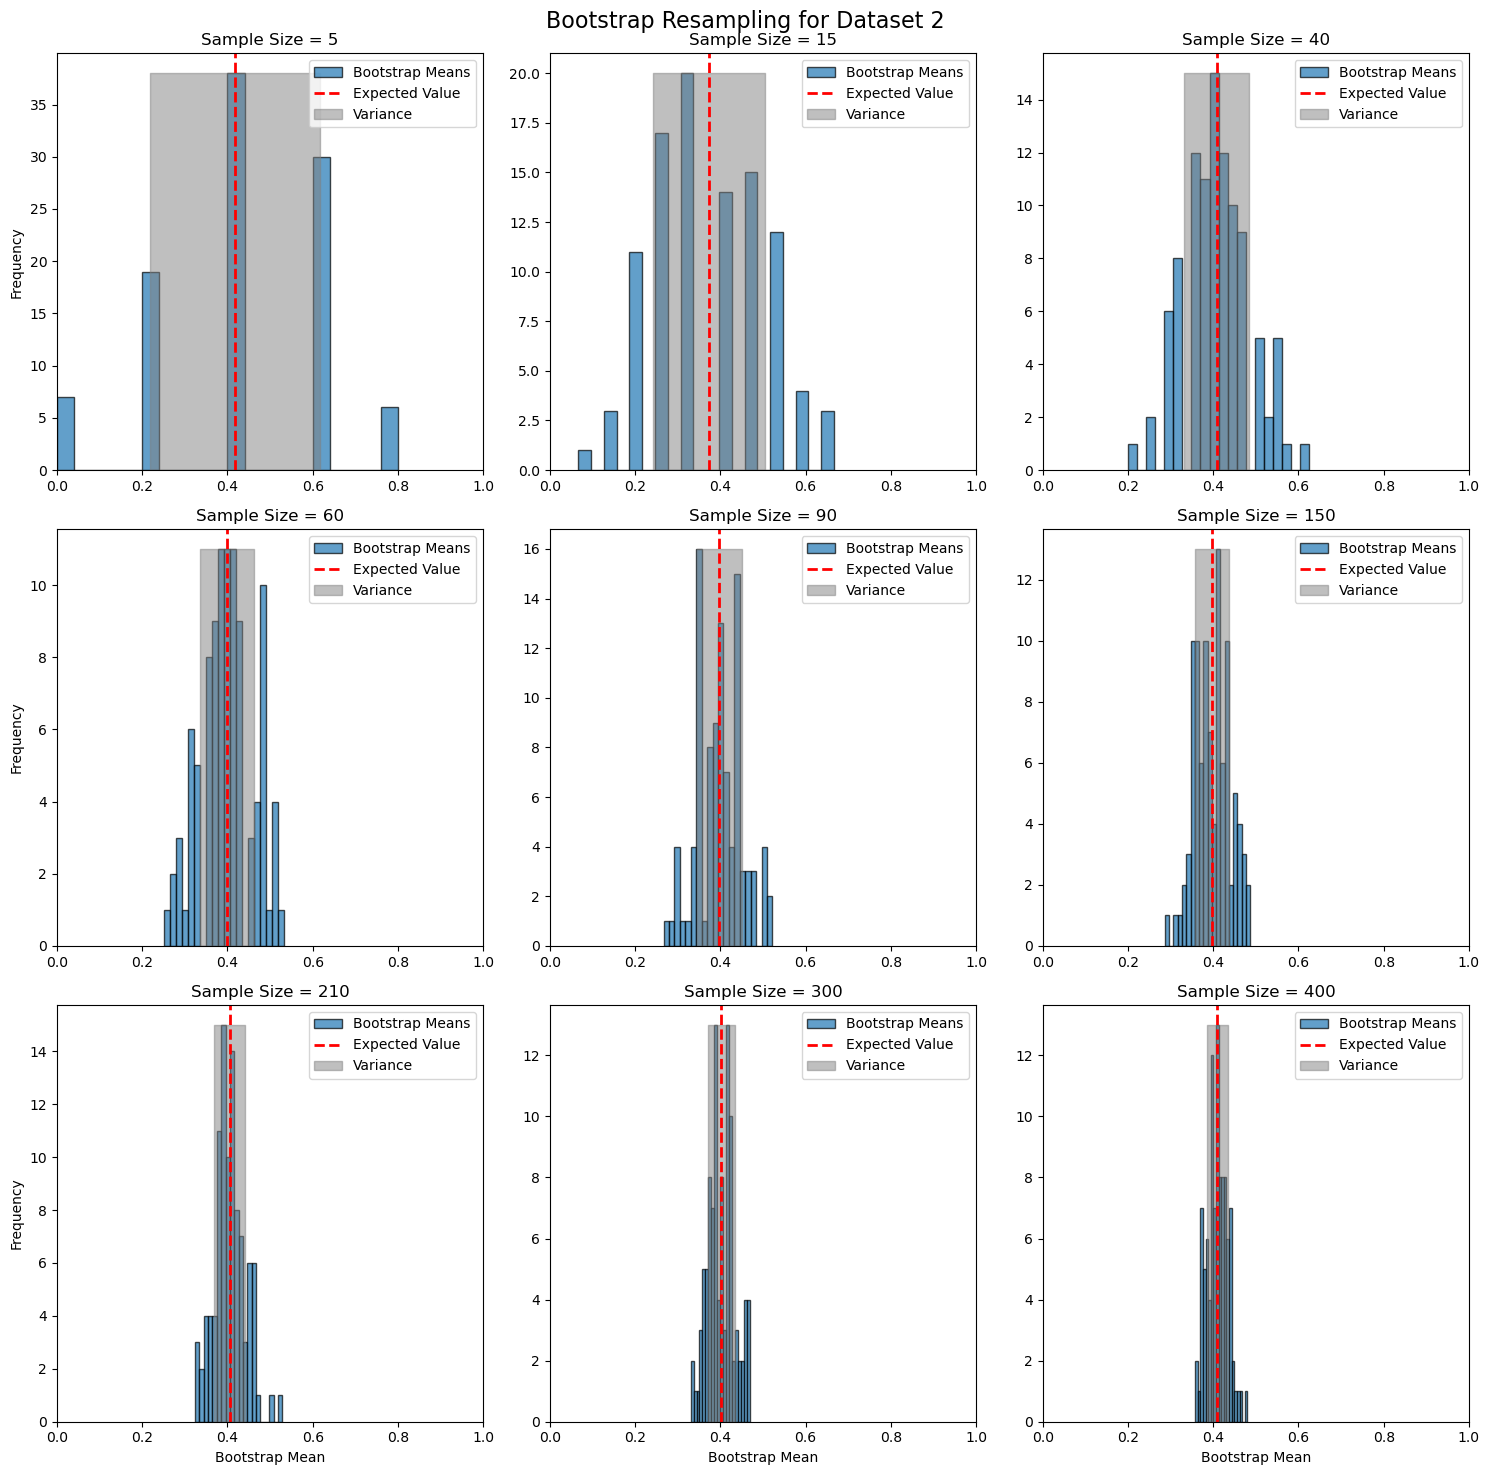

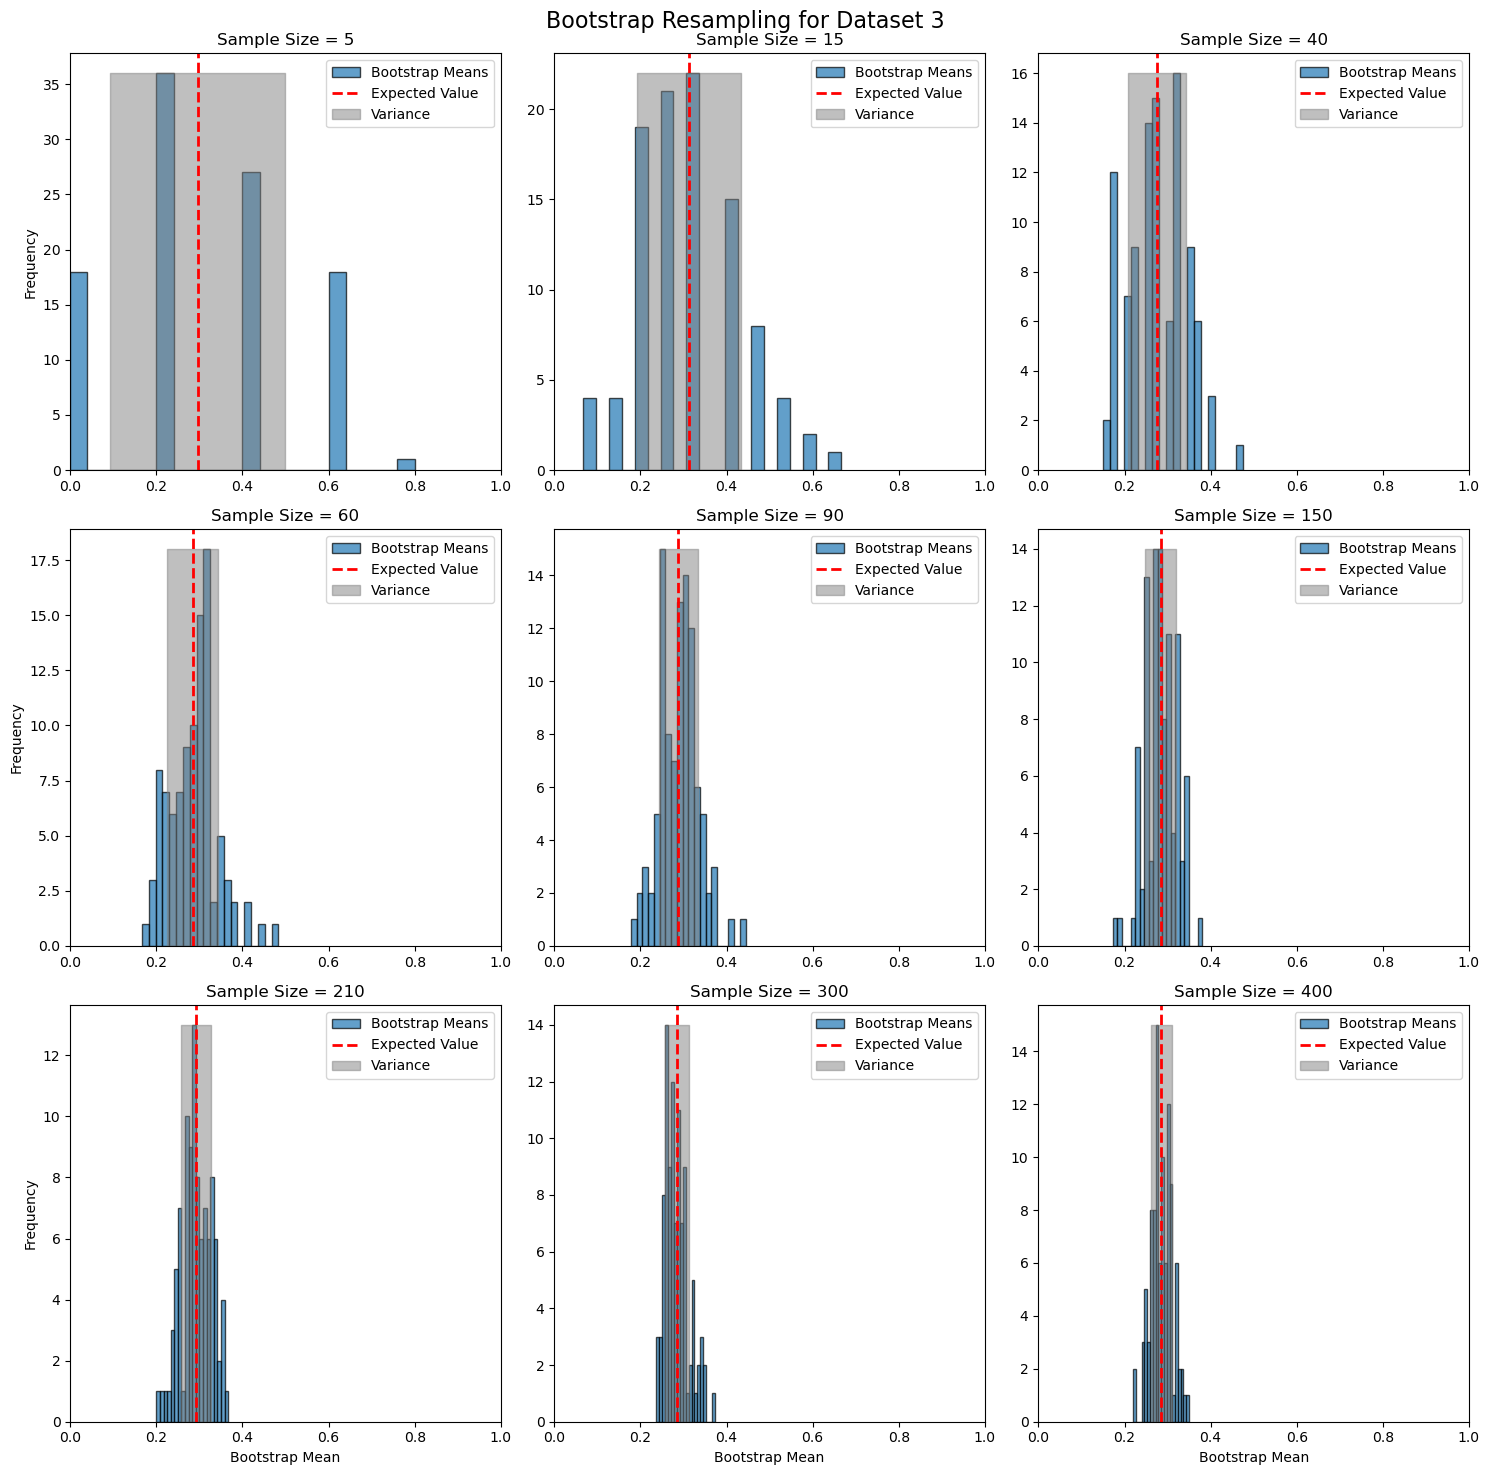

'--------------------Write your code above this line------------------------------'

In [12]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

dataset_1 = load_data('problem_1/dataset_1.json')
dataset_2 = load_data('problem_1/dataset_2.json')
dataset_3 = load_data('problem_1/dataset_3.json')

def bootstrap_resample(dataset, num_samples, num_resamples=100):
    means = []
    for _ in range(num_resamples):
        resample = np.random.choice(dataset, size=num_samples, replace=True)
        means.append(np.mean(resample))
    return means

sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
datasets = [dataset_1, dataset_2, dataset_3]

# there are three data sets we want to consider
for i, dataset in enumerate(datasets):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Bootstrap Resampling for Dataset {i+1}', fontsize=16)

    # and there are 9 sample sizes we want to consider
    for j, sample_size in enumerate(sample_sizes):
        resampled_means = bootstrap_resample(dataset, sample_size)

        # expectation and variance calculated
        expectation = np.mean(resampled_means)
        variance = np.var(resampled_means)
        std_dev = np.sqrt(variance)
        text_str = f'Expected value={expectation:.4f}\nVar={variance:.4f}'
        # ax.text(0.05, 0.9, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')

        # decide which subplot to put on
        ax = axs[j // 3, j % 3]
        n, bins, patches = ax.hist(resampled_means, bins=20, edgecolor='k', alpha=0.7, label='Bootstrap Means')

        ax.set_xlim(0, 1)

        # expected value and variance (standard deviation)
        ax.axvline(expectation, color='red', linestyle='dashed', linewidth=2, label='Expected Value')
        ax.fill_betweenx([0, max(n)], expectation - std_dev, expectation + std_dev, color='gray', alpha=0.5, label='Variance')

        ax.set_title(f'Sample Size = {sample_size}')
        ax.legend()
        if j % 3 == 0:
            ax.set_ylabel('Frequency')
        if j // 3 == 2:
            ax.set_xlabel('Bootstrap Mean')

    plt.tight_layout()
    plt.show()




'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

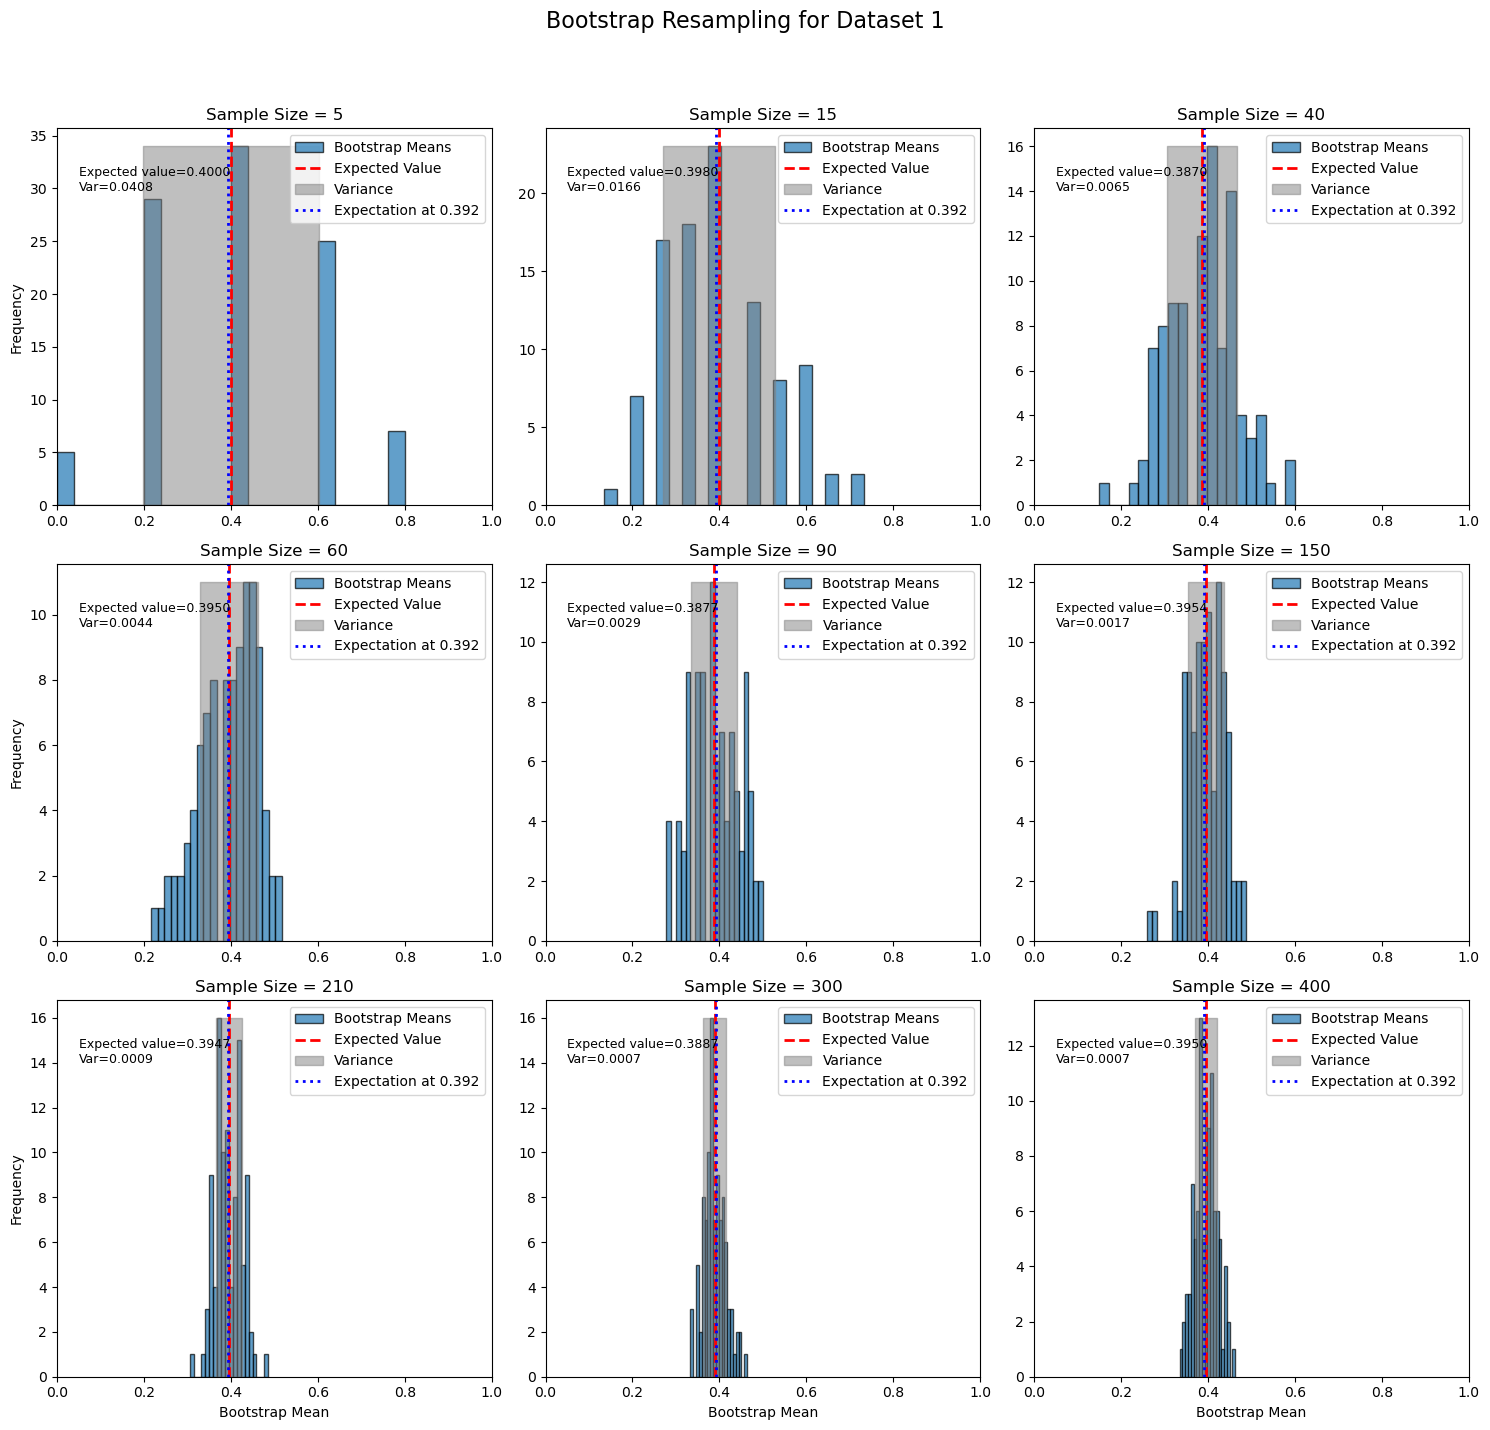

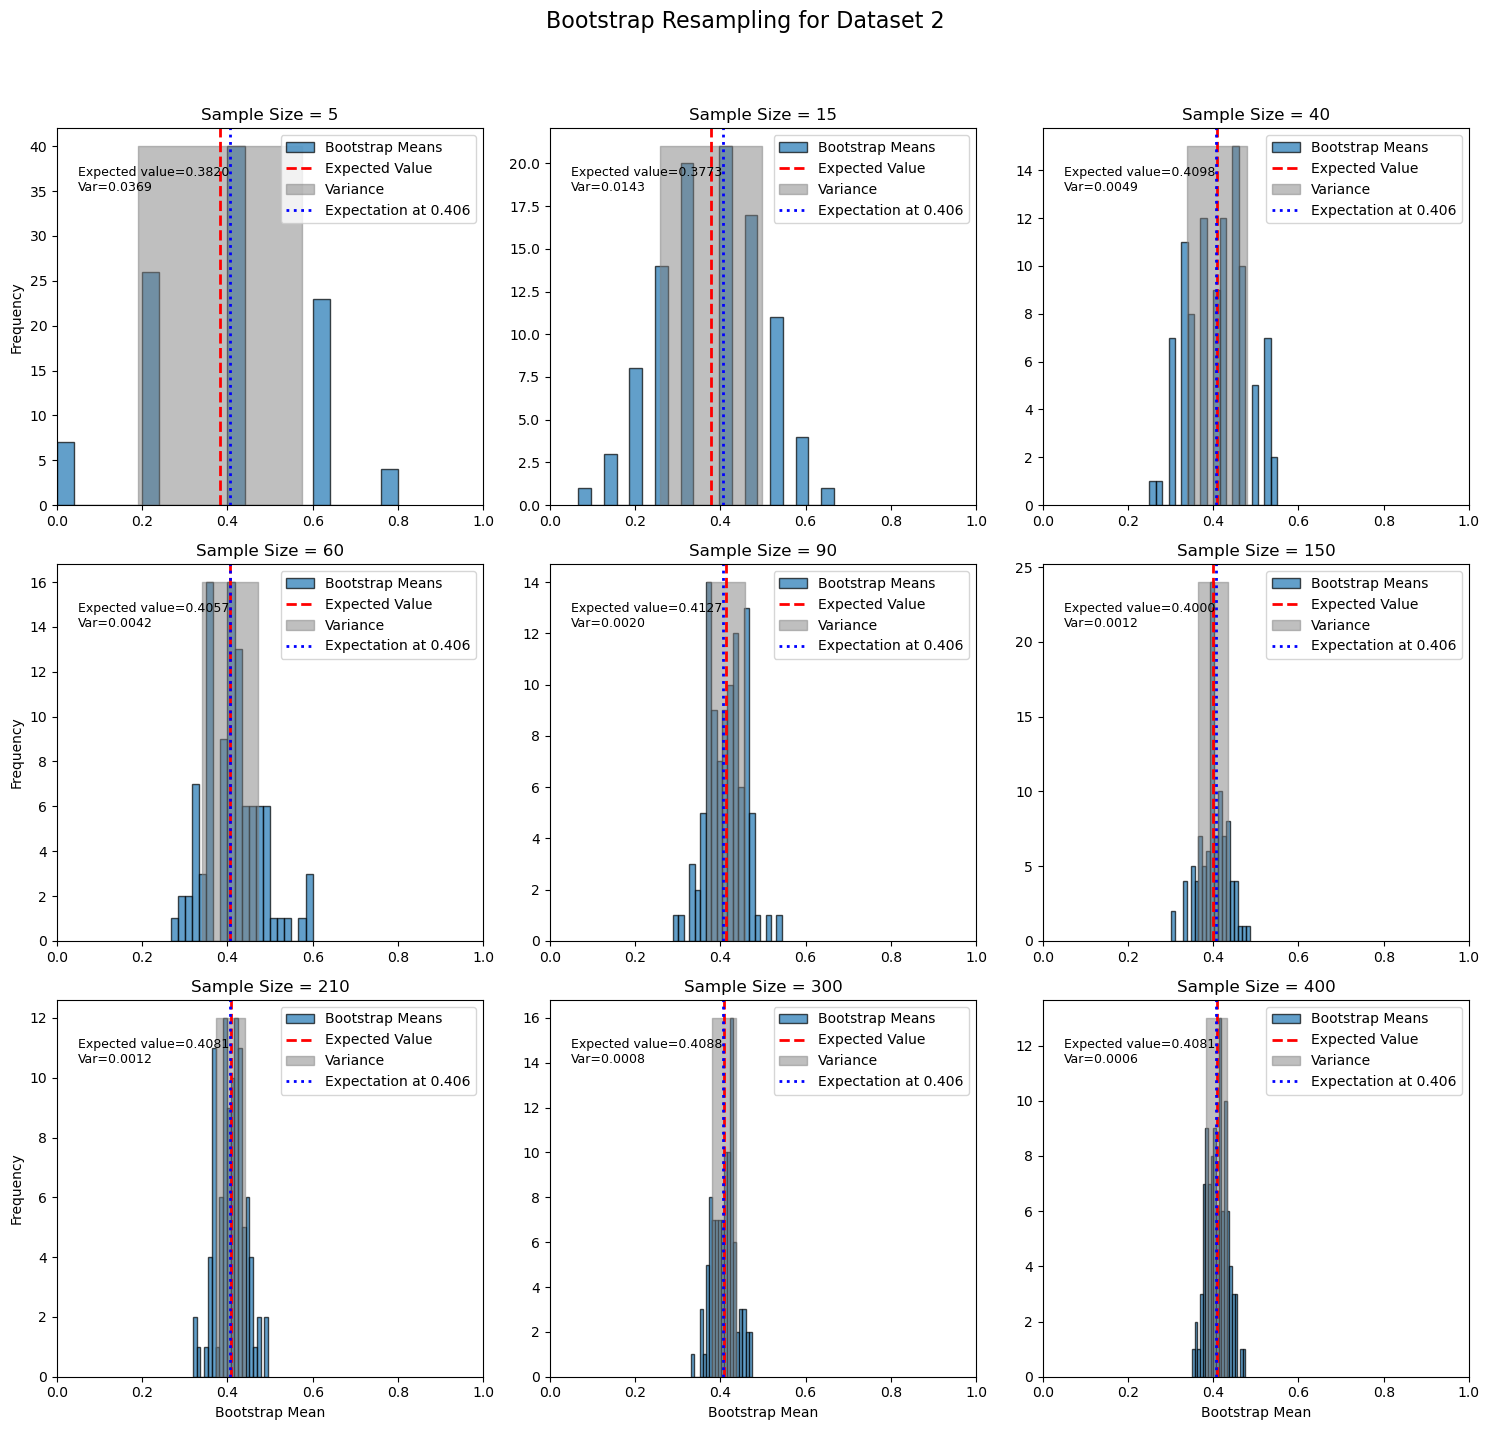

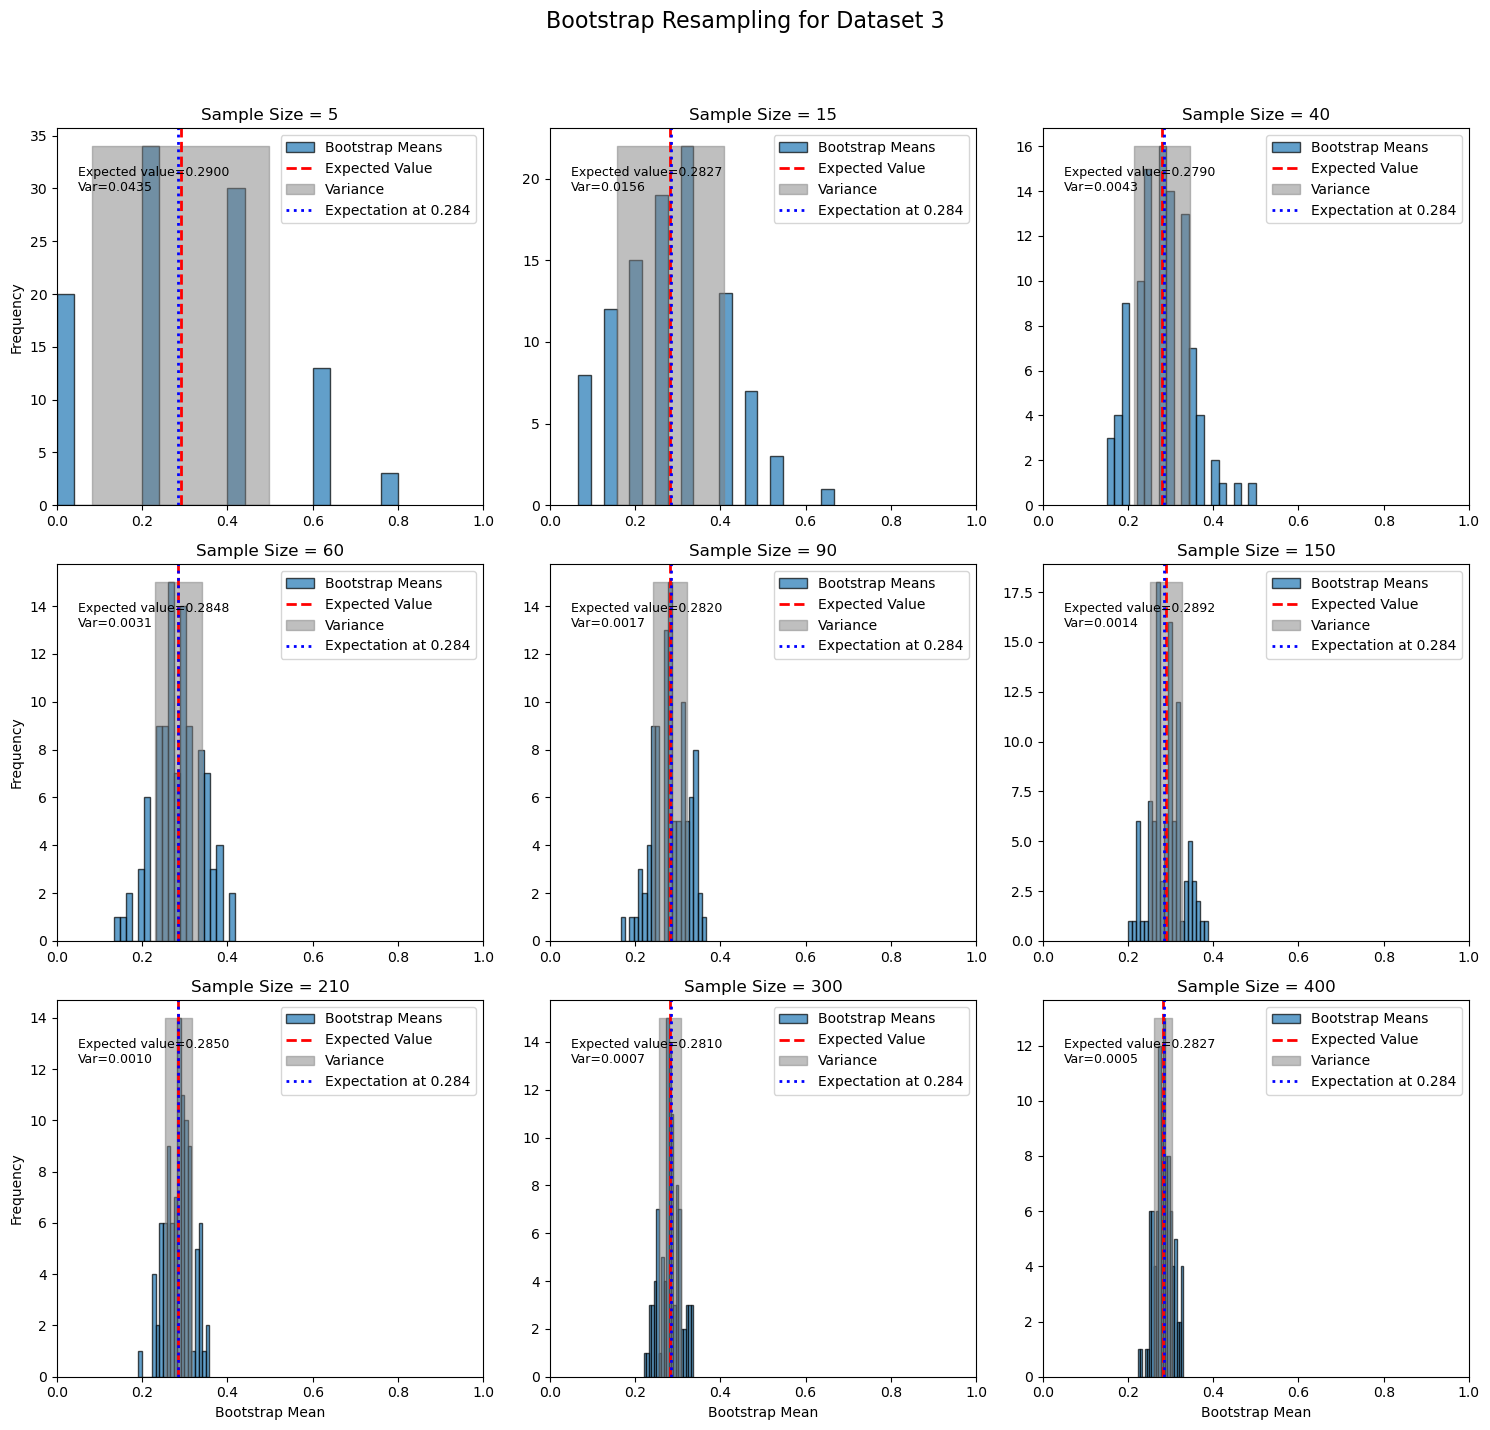

'--------------------Write your code above this line------------------------------'

In [8]:


'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

dataset_1 = load_data('problem_1/dataset_1.json')
dataset_2 = load_data('problem_1/dataset_2.json')
dataset_3 = load_data('problem_1/dataset_3.json')

def bootstrap_resample(dataset, num_samples, num_resamples=100):
    means = []
    for _ in range(num_resamples):
        resample = np.random.choice(dataset, size=num_samples, replace=True)
        means.append(np.mean(resample))
    return means

sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
datasets = [dataset_1, dataset_2, dataset_3]
lines_for_datasets = [0.392, 0.406, 0.284]

# there are three data sets we want to consider
for i, dataset in enumerate(datasets):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Bootstrap Resampling for Dataset {i+1}', fontsize=16)

    specific_line_value = lines_for_datasets[i]

    # different sample sizes
    for j, sample_size in enumerate(sample_sizes):
        resampled_means = bootstrap_resample(dataset, sample_size)
        
        # expectation and variance calculated
        expectation = np.mean(resampled_means)
        variance = np.var(resampled_means)
        std_dev = np.sqrt(variance)

        # decide which subplot to put our plot on
        ax = axs[j // 3, j % 3]

        n, bins, patches = ax.hist(resampled_means, bins=20, edgecolor='k', alpha=0.7, label='Bootstrap Means')
        ax.set_xlim(0, 1)

        # expected value and variance (standard deviation)
        ax.axvline(expectation, color='red', linestyle='dashed', linewidth=2, label='Expected Value')
        ax.fill_betweenx([0, max(n)], expectation - std_dev, expectation + std_dev, color='gray', alpha=0.5, label='Variance')

        ax.axvline(specific_line_value, color='blue', linestyle='dotted', linewidth=2, label=f'Expectation at {specific_line_value}')

        ax.set_title(f'Sample Size = {sample_size}')
        ax.legend()

        text_str = f'Expected value={expectation:.4f}\nVar={variance:.4f}'
        ax.text(0.05, 0.9, text_str, transform=ax.transAxes, fontsize=9, verticalalignment='top')

        if j % 3 == 0:
            ax.set_ylabel('Frequency')
        if j // 3 == 2:
            ax.set_xlabel('Bootstrap Mean')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
# the expectation value is slightly different the previous question, but as the sample size increases,
# these values become closer, and the variance become smaller
'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, decay_constant):
        self.lambda_ = decay_constant
    def z(self):
        return np.exp(-1 / self.lambda_)
    def pdf_decay(self, x):
        result = (1 / self.z()) * (1 / self.lambda_) * np.exp(-x / self.lambda_)
        return result


particle = Particle(decay_constant=2)
x_values = np.array([1, 2, 3])
probabilities = particle.pdf_decay(x_values)
print('Probability densities:', probabilities)



'''--------------------Write your code above this line------------------------------'''

Probability densities: [0.5        0.30326533 0.18393972]


'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

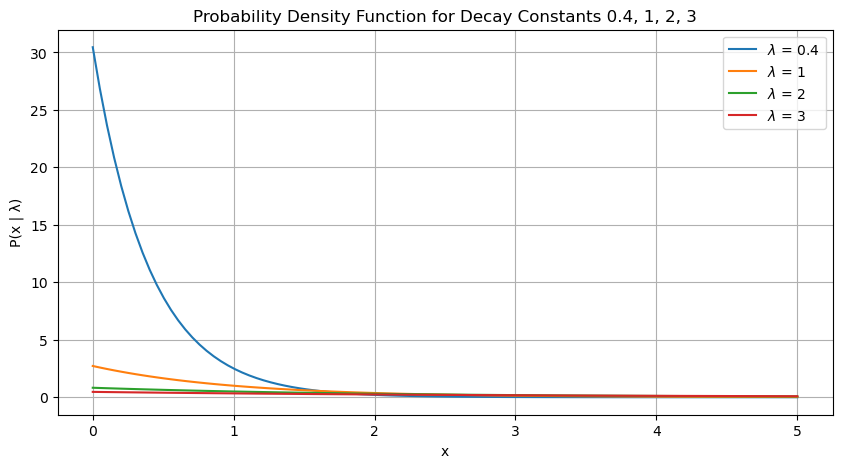

'--------------------Write your code above this line------------------------------'

In [14]:


'''--------------------Write your code below this line------------------------------'''
particles = [Particle(decay_constant) for decay_constant in [0.4, 1, 2, 3]]

x_values = np.linspace(0, 5, 100)

plt.figure(figsize=(10, 5))
for particle in particles:
    plt.plot(x_values, particle.pdf_decay(x_values), label=f'$\lambda$ = {particle.lambda_}')

plt.xlabel('x')
plt.ylabel('P(x | λ)')
plt.title('Probability Density Function for Decay Constants 0.4, 1, 2, 3')
plt.legend()
plt.grid(True)
plt.show()

'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

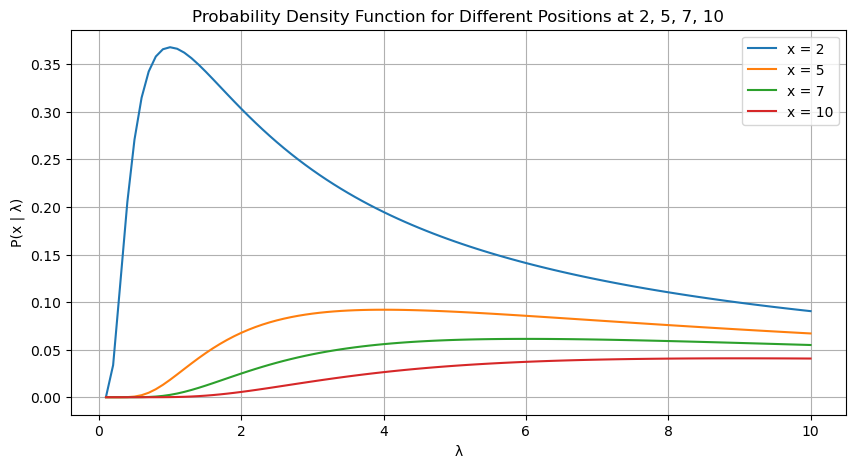

'--------------------Write your code above this line------------------------------'

In [15]:

'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, position):
        self.x = position
    

    def pdf_decay(self, lambda_):
        if self.x <= 0:
            return 0
        else:
            result = (1 / np.exp(-1 / lambda_)) * (1 / lambda_) * np.exp(-self.x / lambda_)
            return result
        

particles = [Particle(pos) for pos in [2, 5, 7, 10]]

lambda_values = np.linspace(0.1, 10, 100)

plt.figure(figsize=(10, 5))
for particle in particles:
    plt.plot(lambda_values, [particle.pdf_decay(l) for l in lambda_values], label=f'x = {particle.x}')

plt.xlabel('λ')
plt.ylabel('P(x | λ)')
plt.title('Probability Density Function for Different Positions at 2, 5, 7, 10')
plt.legend()
plt.grid(True)
plt.show()

'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


In [16]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''
class Particle:
    def pdf_decay(x, lambda_):
        result = (1 / np.exp(-1 / lambda_)) * (1 / lambda_) * np.exp(-x / lambda_)
        return result
    def plot_3d_surface(x_range, lambda_range, output_path):
        X, L = np.meshgrid(x_range, lambda_range)
        Z = Particle.pdf_decay(X, L)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, L, Z, cmap='viridis', edgecolor='none')

        ax.set_xlabel('X (Position)')
        ax.set_ylabel('Lambda (Decay Constant)')
        ax.set_zlabel('P(x | λ)')
        ax.set_title('3D Surface Plot of P(x | λ)')
        fig.colorbar(surf)

        plt.savefig(output_path)
        plt.show()
user_defined_path = input("Please enter the file path for saving the 3D plot image: ")

'''--------------------Write your code above this line------------------------------'''

Please enter the file path for saving the 3D plot image:  .


'--------------------Write your code above this line------------------------------'

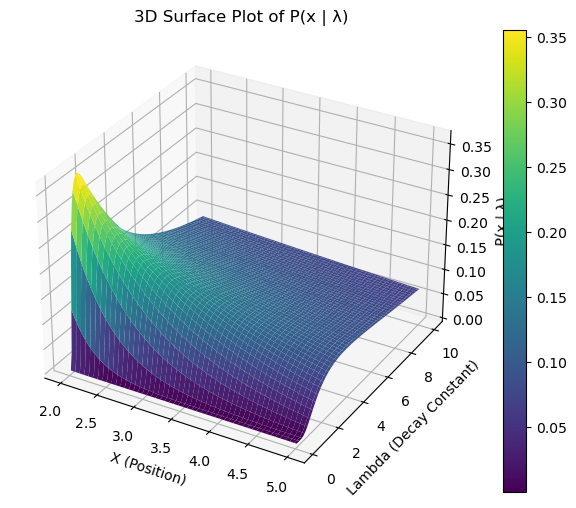

'--------------------Write your code above this line------------------------------'

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

x_range = np.linspace(2, 5, 100)
lambda_range = np.linspace(0.1, 10, 100)

Particle.plot_3d_surface(x_range, lambda_range, user_defined_path + '/3d_surface_plot.png')



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




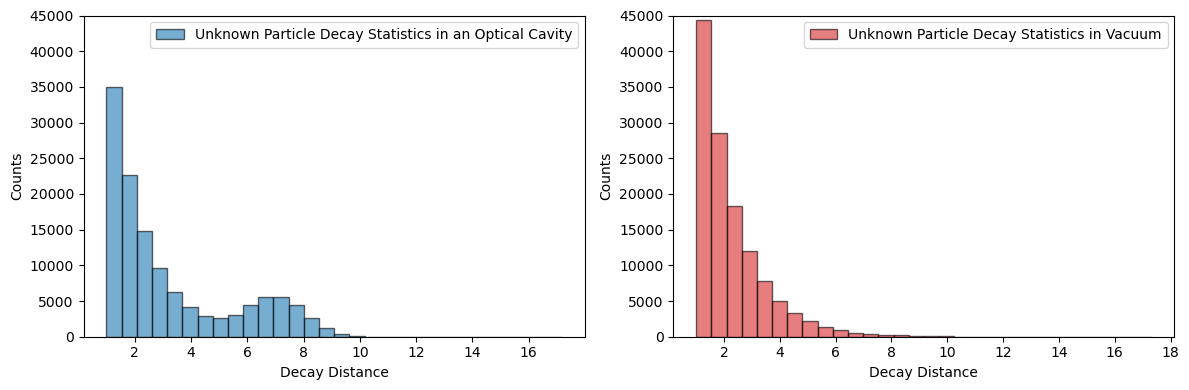

## E)
you can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

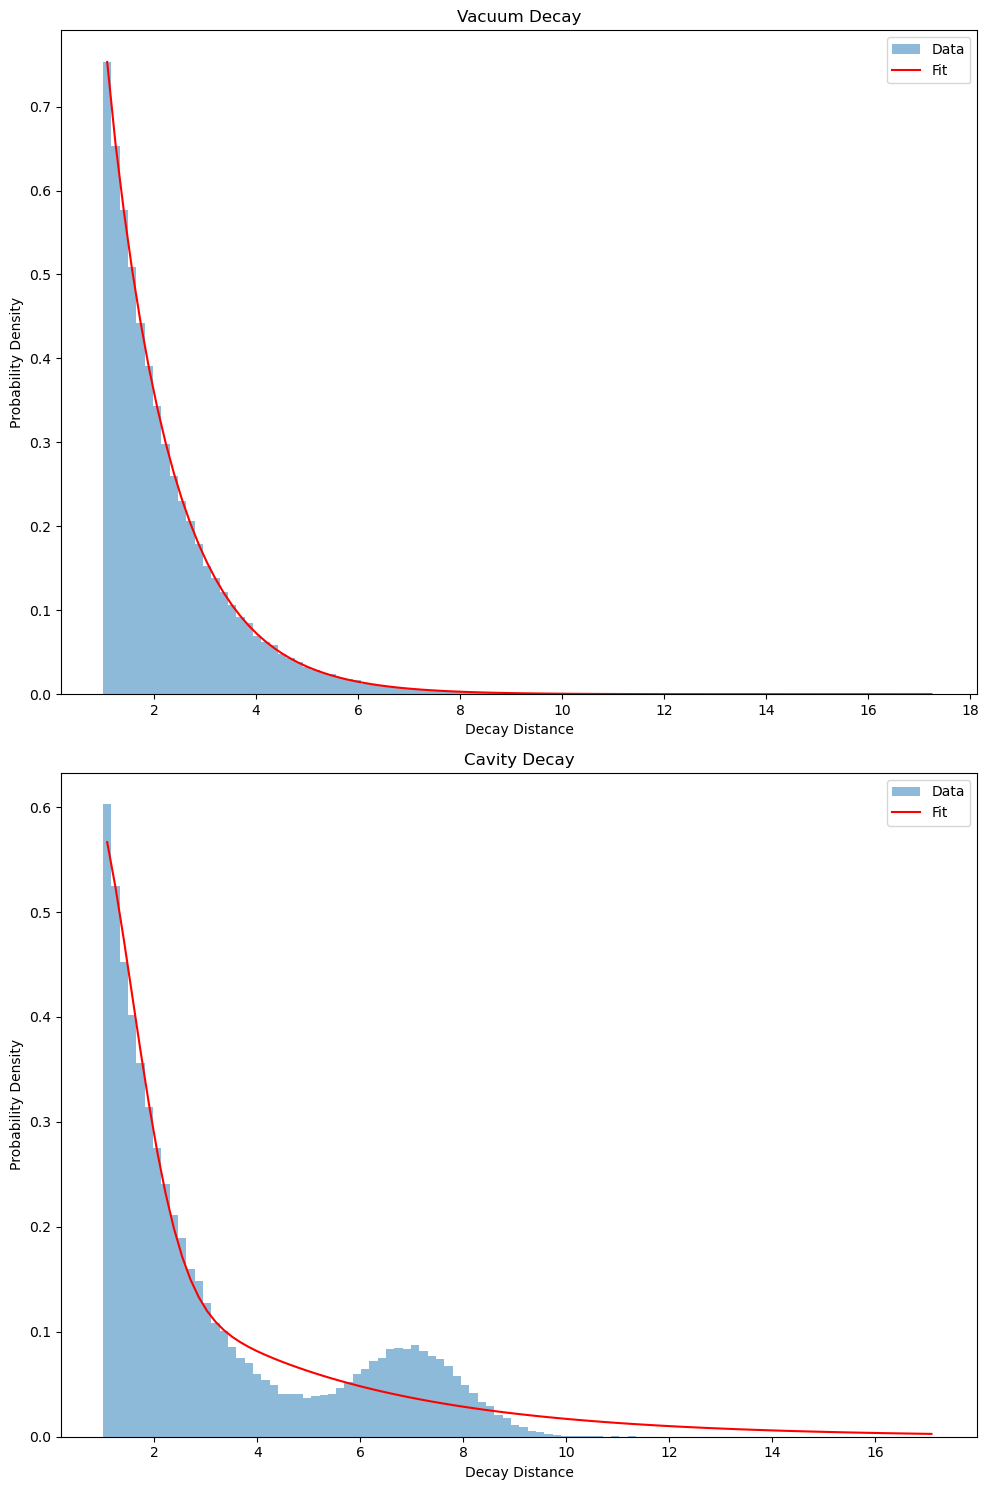

'--------------------Write your code above this line------------------------------'

In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import json
from scipy.stats import norm


'''--------------------Write your code below this line------------------------------'''

from scipy.optimize import curve_fit

def combined_decay(x, a, b, mu, sigma):
    exponential_decay = a * np.exp(b * x)
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
    return exponential_decay + gaussian

with open('Problem_2/Vacuum_decay_dataset.json', 'r') as f:
    vacuum_data = json.load(f)

with open('Problem_2/Cavity_decay_dataset.json', 'r') as f:
    cavity_data = json.load(f)

hist_vacuum, bin_edges_vacuum = np.histogram(vacuum_data, bins=100, density=True)
bin_centers_vacuum = (bin_edges_vacuum[:-1] + bin_edges_vacuum[1:]) / 2
params_vacuum, covariance_vacuum = curve_fit(combined_decay, bin_centers_vacuum, hist_vacuum, p0=(1, -0.1, 0, 1))

hist_cavity, bin_edges_cavity = np.histogram(cavity_data, bins=100, density=True)
bin_centers_cavity = (bin_edges_cavity[:-1] + bin_edges_cavity[1:]) / 2
params_cavity, covariance_cavity = curve_fit(combined_decay, bin_centers_cavity, hist_cavity, p0=(1, -0.1, 0, 1))

fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Vacuum Decay
axs[0].set_title("Vacuum Decay")
axs[0].hist(vacuum_data, bins=100, density=True, alpha=0.5, label="Data")
axs[0].plot(bin_centers_vacuum, combined_decay(bin_centers_vacuum, *params_vacuum), label="Fit", color='red')
axs[0].set_xlabel("Decay Distance")
axs[0].set_ylabel("Probability Density")
axs[0].legend()

# Cavity Decay
axs[1].set_title("Cavity Decay")
axs[1].hist(cavity_data, bins=100, density=True, alpha=0.5, label="Data")
axs[1].plot(bin_centers_cavity, combined_decay(bin_centers_cavity, *params_cavity), label="Fit", color='red')
axs[1].set_xlabel("Decay Distance")
axs[1].set_ylabel("Probability Density")
axs[1].legend()

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
$M(t|\lambda) = \int_0^\infty dx e^{t x} P(x\ |\ \lambda$ <br>
$M(t|\lambda) = \int_0^\infty dx e^{t x}e^{1/\lambda}(1/\lambda)e^{-x/\lambda}$ <br>
$M(t|\lambda) = e^{1/\lambda}(1/\lambda) \frac{1}{t-1/\lambda} [e^{t-1/\lambda)\infty} - e^0]$ <br>
$M(t|\lambda) = e^{1/\lambda}(1/\lambda) \frac{1}{t-1/\lambda} [0-1]$ <br>
$M(t|\lambda) = \frac{e^{1/\lambda}}{1-\lambda}$
<br>
'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
The mean can be computed by taking the first derivative and find the place when the first derivative goes to 0. <br>
$\mu = \left. \frac{\partial}{\partial t} M(t|\ \lambda) \right|_{t=0} $ <br>
$\frac{\partial}{\partial t} M(t|\ \lambda) = \frac{\partial}{\partial t} \left( \frac{e^{1/\lambda}}{1 - \lambda t} \right) = \frac{\lambda e^{1/\lambda}}{(1 - \lambda t)^2} $ <br>
at t=0, <br>
$\mu = \lambda e^{1/\lambda} (t=0)$
<br>
The variance can be calculated from setting the second derivative of the MGF to t=0: <br>
$ \left. \frac{\partial^2}{\partial t^2} M(t|\ \lambda) \right|_{t=0}$ <br>
$ \frac{\partial^2}{\partial t^2} M(t|\ \lambda) = \frac{\partial}{\partial t} \left( \frac{\lambda e^{1/\lambda}}{(1 - \lambda t)^2} \right) = \frac{2\lambda^2 e^{1/\lambda}}{(1 - \lambda t)^3}$ <br>
$\text{Var}(x) = \lambda^2 e^{1/\lambda}(2 - e^{1/\lambda})$ <br>
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

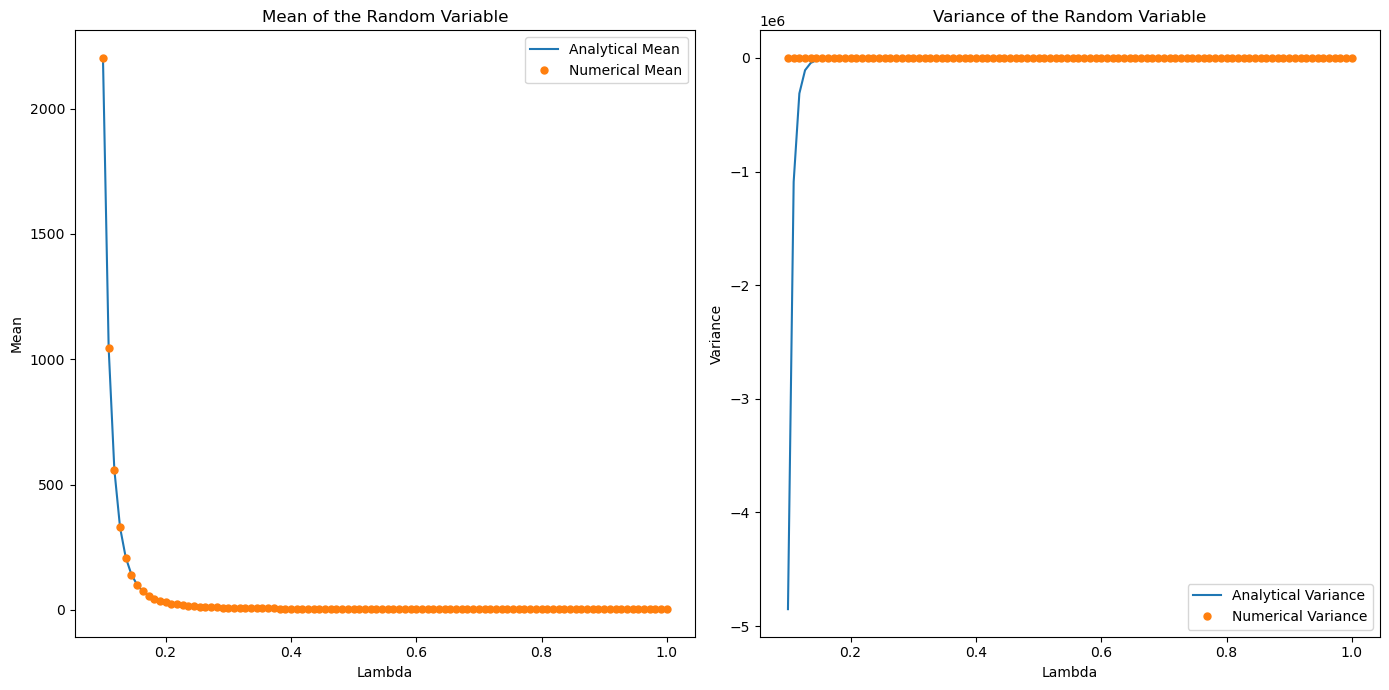

'--------------------Write your code above this line------------------------------'

In [22]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

# Define the MGF
def MGF(t, lambd):
    return np.exp(1/lambd) / (1 - lambd * t)

h = 1e-4

lambdas = np.linspace(0.1, 1, 100)

analytical_mean = lambdas * np.exp(1/lambdas)
analytical_variance = lambdas**2 * np.exp(1/lambdas) * (2 - np.exp(1/lambdas))

numerical_mean = (MGF(h, lambdas) - MGF(0, lambdas)) / h
numerical_variance = (MGF(h, lambdas) - 2*MGF(0, lambdas) + MGF(-h, lambdas)) / h**2

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# (mean)
axs[0].plot(lambdas, analytical_mean, label='Analytical Mean')
axs[0].plot(lambdas, numerical_mean, 'o', label='Numerical Mean', markersize=5)
axs[0].set_title('Mean of the Random Variable')
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Mean')
axs[0].legend()

# (variance)
axs[1].plot(lambdas, analytical_variance, label='Analytical Variance')
axs[1].plot(lambdas, numerical_variance, 'o', label='Numerical Variance', markersize=5)
axs[1].set_title('Variance of the Random Variable')
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('Variance')
axs[1].legend()

plt.tight_layout()
plt.show()




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
we use $M(t) = \sum_{x=0}^{N} e^{tx} \binom{N}{x} p^{x} (1-p)^{N-x}$
<br>
we can then use binomial theorem: $(a + b)^n = \sum_{x=0}^{N} \binom{n}{k} a^{k} b^{n-k}$ <br>
plugging into the binomial theorem: $M(t) = \sum_{x=0}^n \binom{n}{x}(pe^t)^x(1-p)^{n-x}$ <br>
$M(t) = (pe^t+(1-p))^n$ <br>
'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
the mean can be calculated by taking the first derivative and setting it to t at 0: <br>
$\mu = \left.\frac{d}{dt} M(t)\right|_{t=0} = \left.\frac{d}{dt} (pe^t + (1-p))^N \right|_{t=0} = Np$ <br>
and same as last problem, the variance can be obtained by te second moment about the mean: <br>
$\frac{d^2}{dt^2} M(t) = \frac{d}{dt} \left[ N(pe^t + (1-p))^{N-1} \cdot pe^t \right]$ <br>
$\text{Var}(x) = \left.\frac{d^2}{dt^2} M(t)\right|_{t=0} - \mu^2$ <br>
$\text{Var}(x) = \left. N(N-1)(pe^t + (1-p))^{N-2} (pe^t)^2 + N(pe^t + (1-p))^{N-1} pe^t \right|_{t=0} - (Np)^2$ <br>
$\text{Var}(x) = Np(1-p)$
<br>
'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $p$ values. Plot the analytical functions against the numerical results. 

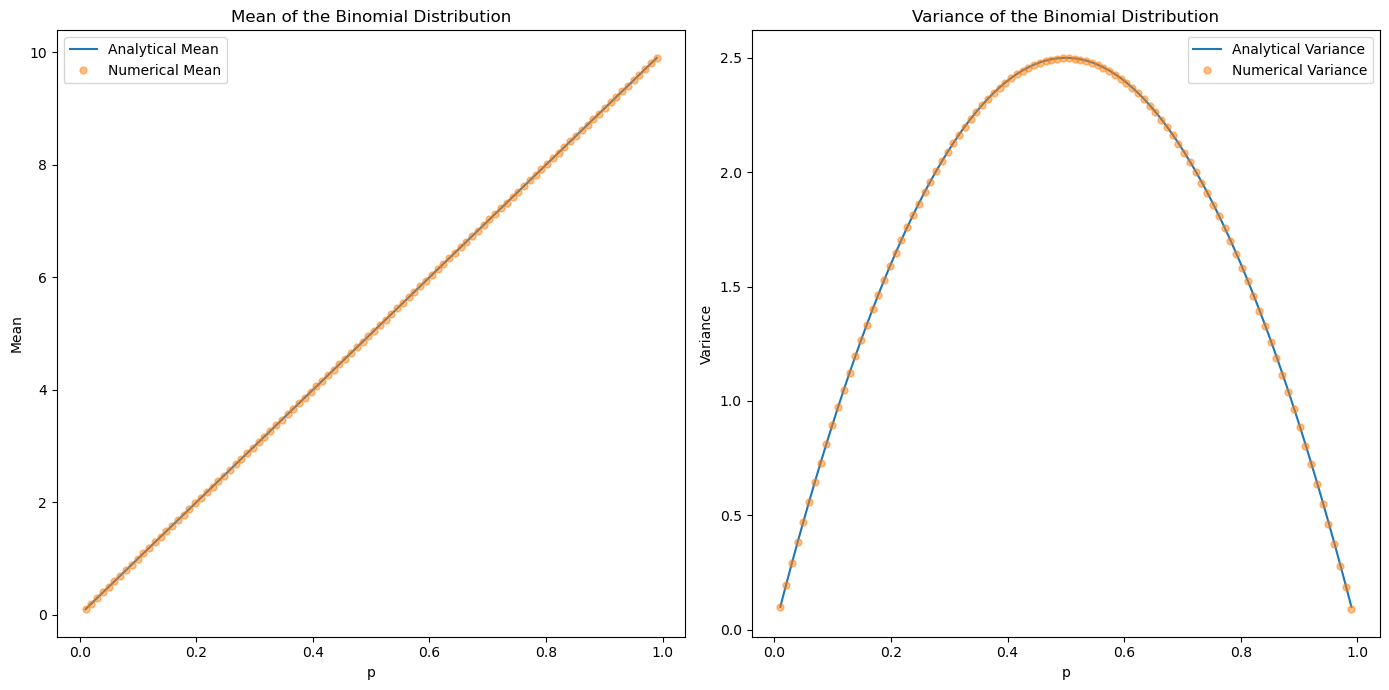

'--------------------Write your code above this line------------------------------'

In [23]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

N = 10 
p_values = np.linspace(0.01, 0.99, 100)
h = 1e-5

def MGF(t, p, N):
    return (p * np.exp(t) + (1 - p)) ** N

# Analytical derivatives
analytical_mean = N * p_values
analytical_variance = N * p_values * (1 - p_values)

# Numerical derivatives
numerical_mean = (MGF(h, p_values, N) - MGF(0, p_values, N)) / h
numerical_variance = (MGF(h, p_values, N) - 2 * MGF(0, p_values, N) + MGF(-h, p_values, N)) / h**2 - numerical_mean**2

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# (mean)
axs[0].plot(p_values, analytical_mean, label='Analytical Mean')
axs[0].plot(p_values, numerical_mean, 'o', markersize=5, label='Numerical Mean', alpha=0.5)
axs[0].set_title('Mean of the Binomial Distribution')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Mean')
axs[0].legend()

# (variance)
axs[1].plot(p_values, analytical_variance, label='Analytical Variance')
axs[1].plot(p_values, numerical_variance, 'o', markersize=5, label='Numerical Variance', alpha=0.5)
axs[1].set_title('Variance of the Binomial Distribution')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Variance')
axs[1].legend()

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''